<a href="https://colab.research.google.com/github/renatocerullo/alura_data_science/blob/master/Formac%CC%A7a%CC%83o_Data_Science_Alura_Ana%CC%81lise_explorato%CC%81ria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

---

### RENATO CERULLO

---

**Considerações Gerais:**

>A análise de dados deve ter início tomando conhecimento das informações que estão disponíveis na base de dados a ser analisada:
- clareza com relação ao entendimento na leitura dos títulos das colunas (se for o caso, renomeá-los)
- inclusão de informações que não vieram prontas na base de dados (médias, totais, contagens, por exemplo)
- se aplicável, retirar informações que não acrescentarão na análise
- entre outras

>O próximo passo, com a base de dados já conhecida e compreendida, terá início a apresentação dessas informações com foco no visual, ou seja, construir gráficos (histograma, barras, etc.) para que possamos identificar alguns pontos que serão interessantes para serem analisados e fazer uma conclusão prévia, não final, que os gráficos nos mostram.
Esses gráficos nos "dão um norte" para que possamos saber quais informações serão analisadas com maior detalhe.

>Com base na intuição acima, deverão ser aplicados testes estatísticos para confirmar ou não a suspeita de algum ponto importante nas informações que foram levantadas durante a análise visual das informações. Somente após a análise do resultado desses testes estatísticos é que as conclusões poderão ser construídas e embasadas.

---

**Considerações Exploratórias MovieLens:**

>**Gêneros Action vs War**

>O gênero Action possui uma quantidade maior de votos em relação ao gênero War, bem como a quantidade de filmes maior também, mas ao analisar a relação entre essas duas variáveis (quantidade de votos / quantidade de filmes), nos mostrou que o gênero War fica à frente e seja mais popular em relação ao gênero Action


>**Gêneros Horror vs Adventure**

>Inicialmente, a análise visual nos mostrou que os filmes do gênero Horror estão à frente do gênero Adventure, tomando a variável Total de Notas para construir a análise.

>Ao iniciar a análise estatística nos mostrou que essa variável tem um valor p inferior à 0.05, portanto, não podendo prosseguir com os testes estatísticos (ztest e ttest)

>Tomando como base a Nota Média entre esses dois gêneros, passou a fazer mais sentido (valor p próximo de 1) e nos mostrou uma ligeira vantagem do gênero Adventure em relação ao gênero Horror, indo contra a avaliação inicial feita visualmente.

---


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


In [0]:
import matplotlib.pyplot as plt

In [4]:
!pip install statsmodels=='0.9.0'
import statsmodels as sm
sm.__version__

'0.9.0'

## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
filmes = pd.read_csv("movies.csv")
filmes.rename(columns={"movieId":"filmeId", "title":"titulo", "genres":"generos"}, inplace = True)
filmes.set_index("filmeId", inplace = True)

In [6]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [7]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [8]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
notas = pd.read_csv("ratings.csv")
notas.rename(columns={"userId":"usuarioId", "movieId":"filmeId", "rating":"nota", "timestamp":"momento"}, inplace = True)

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
filmes["nota_media"] = notas.groupby("filmeId").mean()["nota"]

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_notas` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme

quantidade_de_votos_por_filme = notas.groupby("filmeId").count()["nota"]

In [14]:
# solução para criar a nova coluna e filtrar os filmes

filmes["total_de_notas"] = quantidade_de_votos_por_filme

filmes.query("total_de_notas >= 50", inplace = True)

filmes.describe()

,ano_de_lancamento,nota_media,total_de_notas
count,450.000000,450.000000,450.000000
mean,1993.951111,3.662909,91.911111
std,12.676981,0.383324,46.098385
min,1937.000000,2.207547,50.000000
25%,1990.000000,3.440433,59.000000
50%,1996.000000,3.754464,76.000000
75%,2001.000000,3.943634,107.750000
max,2016.000000,4.429022,329.000000


In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_notas
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

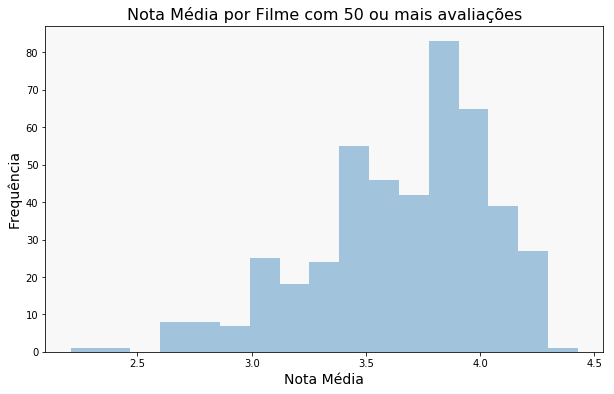

In [16]:
# solução histograma

plt.figure(figsize=(10,6))

ax = sns.distplot(filmes.nota_media, norm_hist = False, kde = False)

ax.set_title("Nota Média por Filme com 50 ou mais avaliações", fontsize = 16)
ax.set_xlabel("Nota Média", fontsize = 14)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_facecolor("#F8F8F8")

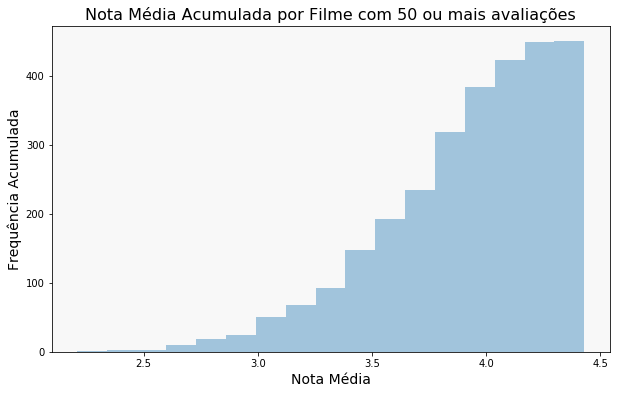

In [17]:
# solução cumulativa

plt.figure(figsize=(10,6))

ax = sns.distplot(filmes.nota_media,
                  hist_kws={"cumulative" : True},
                  kde_kws={"cumulative" : True},
                  norm_hist = False,
                  kde = False)

ax.set_title("Nota Média Acumulada por Filme com 50 ou mais avaliações", fontsize = 16)
ax.set_xlabel("Nota Média", fontsize = 14)
ax.set_ylabel("Frequência Acumulada", fontsize = 14)
ax.set_facecolor("#F8F8F8")

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

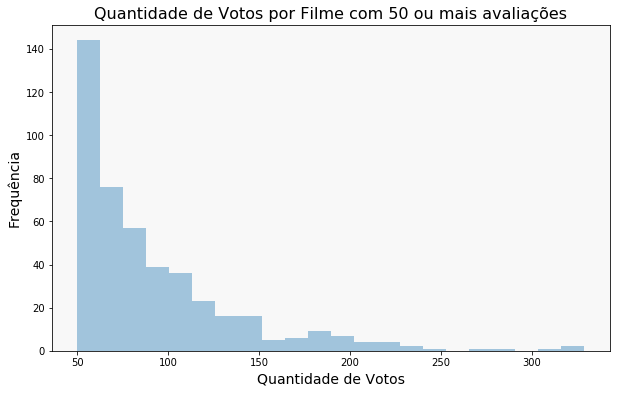

In [18]:
# solução histograma

plt.figure(figsize=(10,6))

ax = sns.distplot(filmes.total_de_notas, norm_hist = False, kde = False)

ax.set_title("Quantidade de Votos por Filme com 50 ou mais avaliações", fontsize = 16)
ax.set_xlabel("Quantidade de Votos", fontsize = 14)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_facecolor("#F8F8F8")

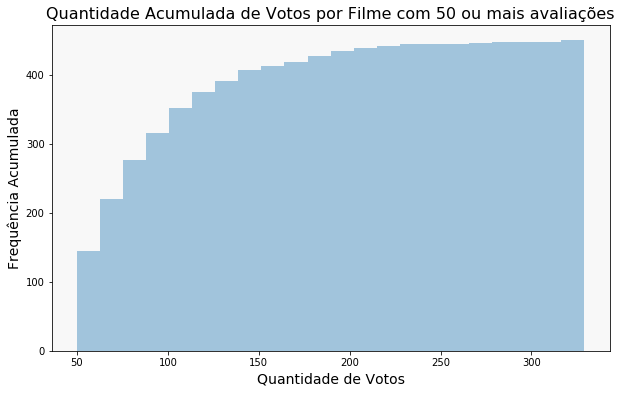

In [19]:
# solução cumulativa

plt.figure(figsize=(10,6))

ax = sns.distplot(filmes.total_de_notas,
                  hist_kws={"cumulative" : True},
                  kde_kws={"cumulative" : True},
                  norm_hist = False,
                  kde = False)

ax.set_title("Quantidade Acumulada de Votos por Filme com 50 ou mais avaliações", fontsize = 16)
ax.set_xlabel("Quantidade de Votos", fontsize = 14)
ax.set_ylabel("Frequência Acumulada", fontsize = 14)
ax.set_facecolor("#F8F8F8")

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução

nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [21]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [22]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [23]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

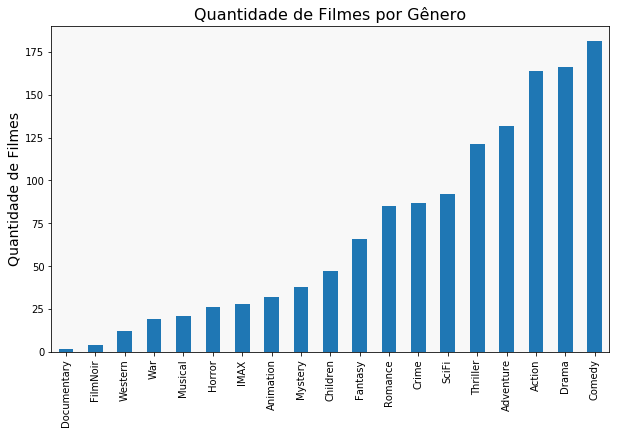

In [24]:
# solução

df = generos.sum().sort_values().to_frame()

ax = df.plot(kind = "bar", legend = False, figsize=(10, 6))

ax.set_title("Quantidade de Filmes por Gênero", fontsize = 16)
ax.set_ylabel("Quantidade de Filmes", fontsize = 14)
ax.set_facecolor("#F8F8F8")

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending = False).head(5)

In [26]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [0]:
# votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)


# Código original fornecido pelo portal Alura, porém estava dando erro por não existir a coluna total_de_votos no dataframe filmes
# no exercícios anteriores solicitava a ciração da coluna total_de_notas

# Criei um tópico no fórum Alura, mas até o momento não obtive retorno de ninguém; sendo assim, prossegui com o desenvolvimento de acordo
# com o meu entendimento.

# Eu fiz a subistituição pelo código a seguir:

In [28]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_notas'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [29]:
# solucão

votos_por_genero_por_filme.sum().sort_values(ascending = False)

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

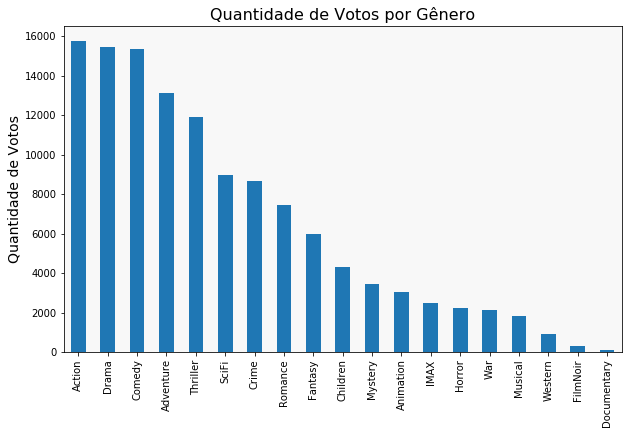

In [30]:
# solução

df = votos_por_genero_por_filme.sum().sort_values(ascending = False).to_frame()

ax = df.plot(kind = "bar", legend = False, figsize=(10, 6))

ax.set_title("Quantidade de Votos por Gênero", fontsize = 16)
ax.set_ylabel("Quantidade de Votos", fontsize = 14)
ax.set_facecolor("#F8F8F8")

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [31]:
# solucao código

quantidade_de_votos_por_genero = votos_por_genero_por_filme.sum()

quantidade_de_filmes_por_genero = votos_por_genero_por_filme[votos_por_genero_por_filme > 0].count()

df = (quantidade_de_votos_por_genero / quantidade_de_filmes_por_genero).sort_values(ascending = False).to_frame()
df.columns = ["Qtd.Votos/Qtd.Filmes por Gênero"]
df

,Qtd.Votos/Qtd.Filmes por Gênero
War,111.210526
Crime,99.413793
Adventure,99.371212
Thriller,98.404959
SciFi,97.706522
Action,95.939024
Animation,95.812500
Drama,93.042169
Children,92.148936
Mystery,90.842105


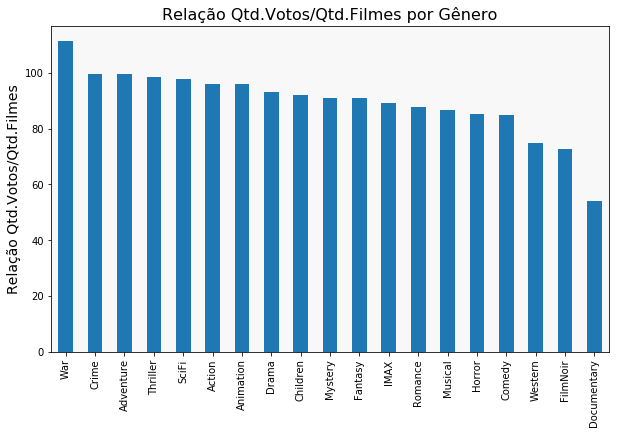

In [32]:
# solução com visualização 

ax = df.plot(kind = "bar", legend = False, figsize=(10, 6))

ax.set_title("Relação Qtd.Votos/Qtd.Filmes por Gênero", fontsize = 16)
ax.set_ylabel("Relação Qtd.Votos/Qtd.Filmes", fontsize = 14)
ax.set_facecolor("#F8F8F8")

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):

---

> O gênero *Action* possui uma quantidade maior de votos em relação ao gênero *War*, bem como a quantidade de filmes maior também.

> Mas ao analisar a relação entre a quantidade de votos e a quantidade de filmes desses gêneros, faz com que o gênero *War* fique à frente do gênero *Action*, o que indica que os filmes do gênero *War* são mais populares em relação aos filmes do gênero *Action*.

---


## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Total de Votos por Gênero (sem outliers)')

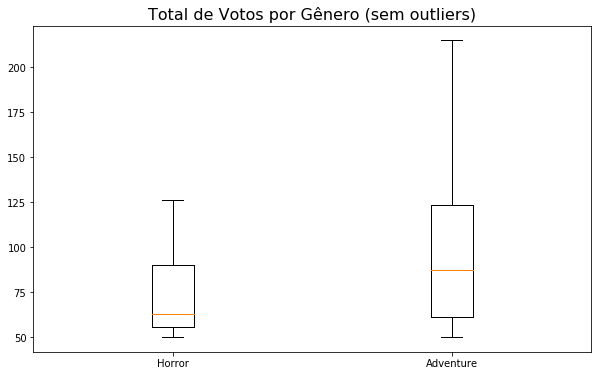

In [33]:
# solução:

total_de_votos_Horror = votos_por_genero_por_filme[votos_por_genero_por_filme["Horror"] > 0].Horror
total_de_votos_Adventure = votos_por_genero_por_filme[votos_por_genero_por_filme["Adventure"] > 0].Adventure

plt.figure(figsize=(10,6))

plt.boxplot([total_de_votos_Horror, total_de_votos_Adventure], labels = ["Horror", "Adventure"], showfliers = False)

plt.title("Total de Votos por Gênero (sem outliers)", fontsize = 16)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [0]:
# Tentei fazer o código abaixo como solução, mas ocorreu o erro: setting an array element with a sequence
# Não consegui resolver o problema

#dados = [votos_por_genero_por_filme.groupby(i) for i in generos.columns]
#plt.boxplot(dados, showfliers = False)
#plt.title("Total de Votos por Gênero (sem outliers)", fontsize = 16)

# Criei um tópico no fórum Alura, mas até o momento não obtive retorno de ninguém; sendo assim, prossegui com o desenvolvimento de acordo
# com o meu entendimento. Segue solução abaixo:

Text(0.5, 1.0, 'Total de Votos por Gênero (sem outliers)')

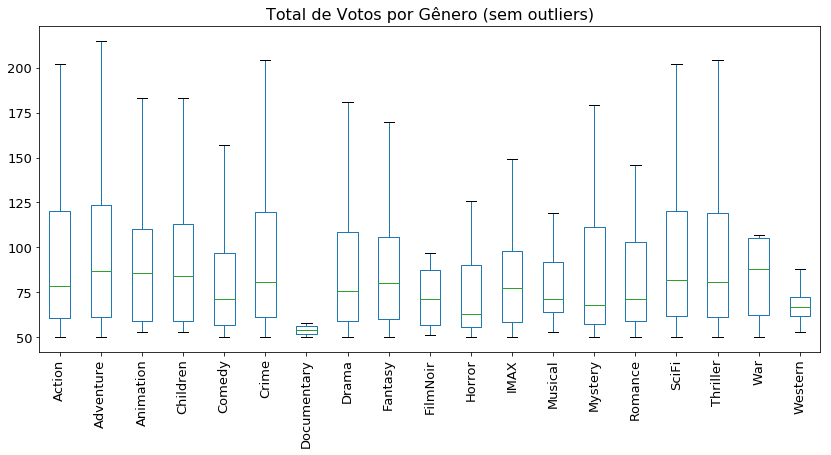

In [35]:
plt.figure(figsize=(14,6))

df = pd.DataFrame(votos_por_genero_por_filme[(votos_por_genero_por_filme > 0)])
ax = df.boxplot(grid = False, rot = 90, fontsize = 13, showfliers = False)
ax.set_title("Total de Votos por Gênero (sem outliers)", fontsize = 16)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:

---

Sugestão para o gênero Adventure

A popularidade dos filmes desse gênero é maior que a popularidade dos filmes do gênero Horror

---


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

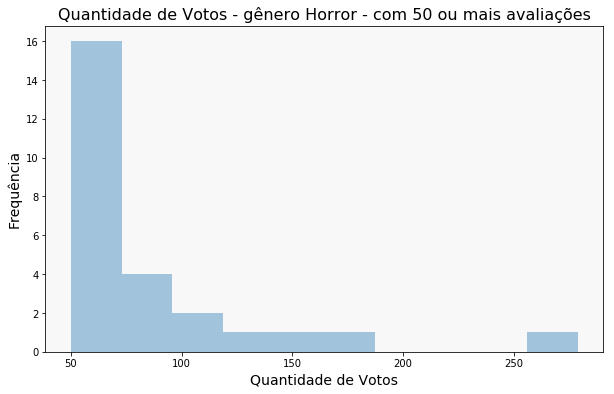

In [36]:
# solucao histograma de aventura

plt.figure(figsize=(10,6))

ax = sns.distplot(total_de_votos_Horror, norm_hist = False, kde = False)

ax.set_title("Quantidade de Votos - gênero Horror - com 50 ou mais avaliações", fontsize = 16)
ax.set_xlabel("Quantidade de Votos", fontsize = 14)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_facecolor("#F8F8F8")

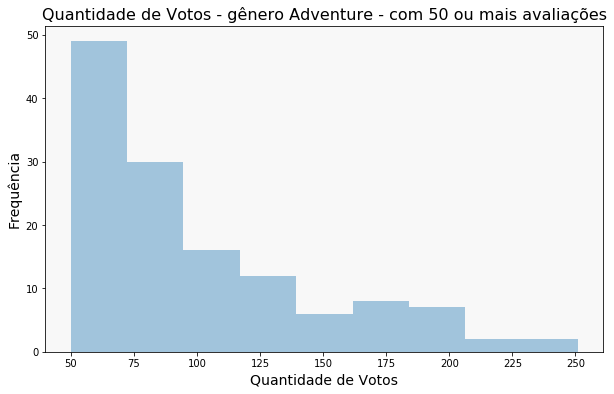

In [37]:
# solucao histograma de horror

plt.figure(figsize=(10,6))

ax = sns.distplot(total_de_votos_Adventure, norm_hist = False, kde = False)

ax.set_title("Quantidade de Votos - gênero Adventure - com 50 ou mais avaliações", fontsize = 16)
ax.set_xlabel("Quantidade de Votos", fontsize = 14)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_facecolor("#F8F8F8")

In [38]:
from scipy.stats import ranksums

_, p = ranksums(total_de_votos_Horror, total_de_votos_Adventure)
p

0.04782366231999856

In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo


# Por ser um valor p inferior à 0.05, não se aplica a utilização de testes estatísticos (ztest e ttest).
# Não se tratam de distribuição normal.

In [0]:
# solução com o teste desejado

# Não se aplica

### Solução (explique sua conclusão):

---

Por ser um valor p inferior à 0.05, não se aplica a utilização de testes estatísticos (ztest e ttest).


Não se tratam de distribuição normal.

---


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Total de Notas Médias por Gênero de Filme')

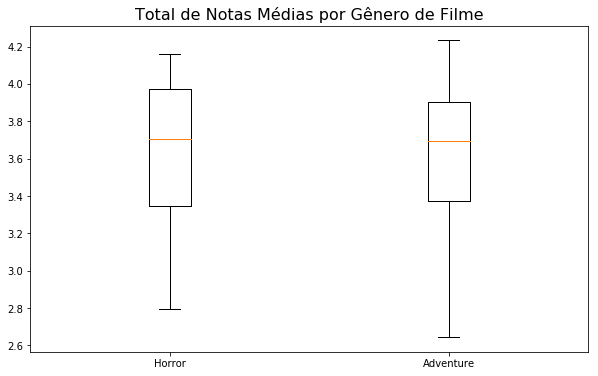

In [41]:
# solução:

total_de_nota_media_Horror = filmes.query("Horror == 1").nota_media
total_de_nota_media_Adventure = filmes.query("Adventure == 1").nota_media

plt.figure(figsize=(10,6))

plt.boxplot([total_de_nota_media_Horror, total_de_nota_media_Adventure], labels = ["Horror", "Adventure"])
plt.title("Total de Notas Médias por Gênero de Filme", fontsize = 16)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

---

Agora com base das Notas Médias dos filmes, a sugestão passa a ser do gênero Horror

Mesmo com menor popularidade se comparado ao gênero Adventure, as notas médias são melhores, principalmente com foco visual nas notas médias do segundo e terceiro quartis.

---


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

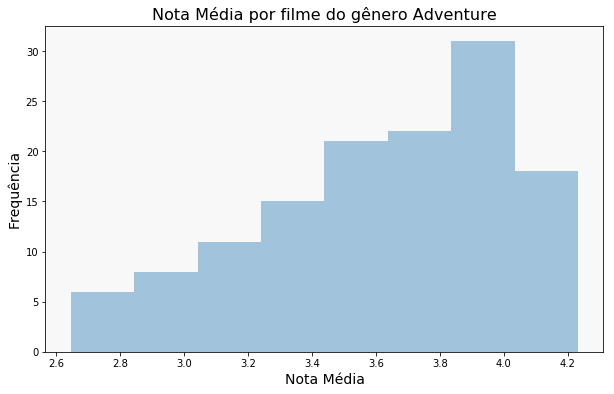

In [42]:
# solucao histograma de aventura

plt.figure(figsize=(10,6))

ax = sns.distplot(total_de_nota_media_Adventure, norm_hist = False, kde = False)

ax.set_title("Nota Média por filme do gênero Adventure", fontsize = 16)
ax.set_xlabel("Nota Média", fontsize = 14)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_facecolor("#F8F8F8")

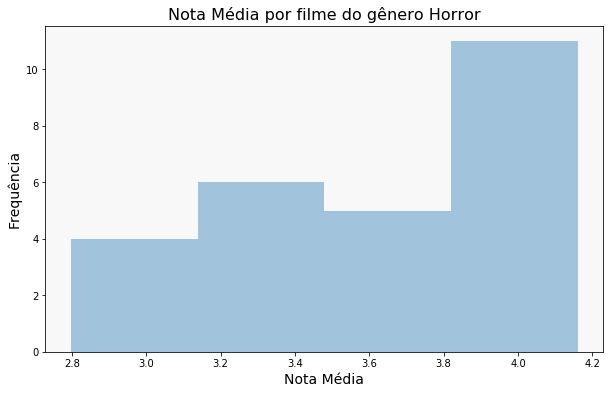

In [43]:
# solucao histograma de horror

plt.figure(figsize=(10,6))

ax = sns.distplot(total_de_nota_media_Horror, norm_hist = False, kde = False)

ax.set_title("Nota Média por filme do gênero Horror", fontsize = 16)
ax.set_xlabel("Nota Média", fontsize = 14)
ax.set_ylabel("Frequência", fontsize = 14)
ax.set_facecolor("#F8F8F8")

In [44]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p = ranksums(total_de_nota_media_Adventure, total_de_nota_media_Horror)
p

0.8310397344212459

In [45]:
# solução com o teste desejado

from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

print(ztest(total_de_nota_media_Horror, total_de_nota_media_Adventure))
zconfint(total_de_nota_media_Horror, total_de_nota_media_Adventure)

(-0.05694426988823663, 0.9545895892323115)


(-0.17166316262580447, 0.16196987742954458)

In [46]:
from scipy.stats import ttest_ind

ttest_ind(total_de_nota_media_Horror, total_de_nota_media_Adventure)

Ttest_indResult(statistic=-0.05694426988823663, pvalue=0.9546624603927559)

In [47]:
from statsmodels.stats.weightstats import DescrStatsW

descr_total_nota_media_Horror = DescrStatsW(total_de_nota_media_Horror)
descr_total_nota_media_Adventure = DescrStatsW(total_de_nota_media_Adventure)
comparacao = descr_total_nota_media_Horror.get_compare(descr_total_nota_media_Adventure)
comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0048,0.085,-0.057,0.955,-0.173,0.163


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

---

Agora com foco na Nota Média entre os filmes desses dois gêneros (Horror e Adventure), o valor p foi superior à 0.05, fazendo com que seja possível a aplicação de testes estatísticos (ztest e/ou ttest).

Com valor p bem próximo à 1 mostra que a média das notas médias dos filmes desses dois gêneros são bem semelhantes.

Visualizando o intervalo de confiança mostra que a média das notas médias dos filmes do gênero Adventure é ligeiramente maior quando comparada com o gênero Horror, portanto, a sugestão passa a ser agora realizar um filme do gênero Adventure.

---


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

---

A sugestão é que seja um filme do gênero Adventure, pois ele é mais popular em relação aos filmes do gênero Horror, bem como a média das notas médias ligeiramente superior.

---


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [0]:
votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending = False)

In [49]:
# solução: calculando os 2 generos mais votados

df = votos_por_genero.head(2).to_frame()
df.columns = ["Qtd.Votos"]
df

,Qtd.Votos
Action,15734.0
Drama,15445.0


In [50]:
# solução: encontrando os top 5 filmes desses generos

filmes.query("Action == 1 | Drama == 1").sort_values("nota_media", ascending = False).head()

,titulo,ano_de_lancamento,nota_media,total_de_notas,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [51]:
# solucao

df = pd.DataFrame(filmes.corr().nota_media)
df.loc[("Drama", "Crime"), :]

,nota_media
Drama,0.277662
Crime,0.190220


In [52]:
df = pd.DataFrame(filmes.corr().nota_media)
df.loc[("Comedy", "Action"), :]

,nota_media
Comedy,-0.256005
Action,-0.154089


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [53]:
# solucao

df = pd.DataFrame(filmes.corr().total_de_notas)
df.loc[("Adventure", "War"), :]

,total_de_notas
Adventure,0.104380
War,0.087999


In [54]:
df = pd.DataFrame(filmes.corr().total_de_notas)
df.loc[("Comedy", "Western"), :]

,total_de_notas
Comedy,-0.128527
Western,-0.060789


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

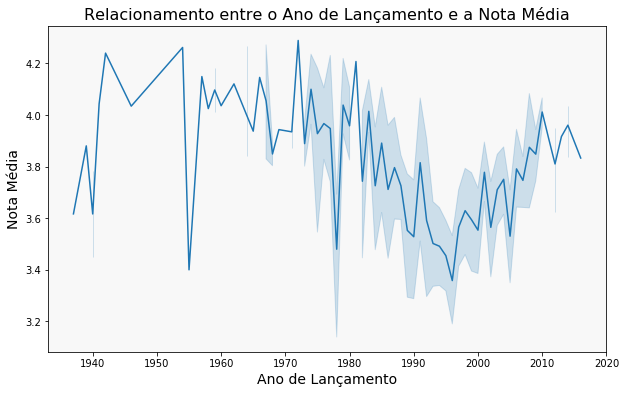

In [55]:
# solucao

plt.figure(figsize=(10,6))

ax = sns.lineplot(data = filmes, x = "ano_de_lancamento", y = "nota_media")

ax.set_title("Relacionamento entre o Ano de Lançamento e a Nota Média", fontsize = 16)
ax.set_xlabel("Ano de Lançamento", fontsize = 14)
ax.set_ylabel("Nota Média", fontsize = 14)
ax.set_facecolor("#F8F8F8")

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [56]:
# solução (código)

df = pd.DataFrame(filmes.corr().total_de_notas)
df.loc[("ano_de_lancamento", "nota_media"), :]

,total_de_notas
ano_de_lancamento,-0.028709
nota_media,0.342584


### Solução (explicação)

---

Como a correlação entre Ano de Lançamento e Nota Média estão próximas de zero, mostra que essas duas características não possuem correlação entre si.

---


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

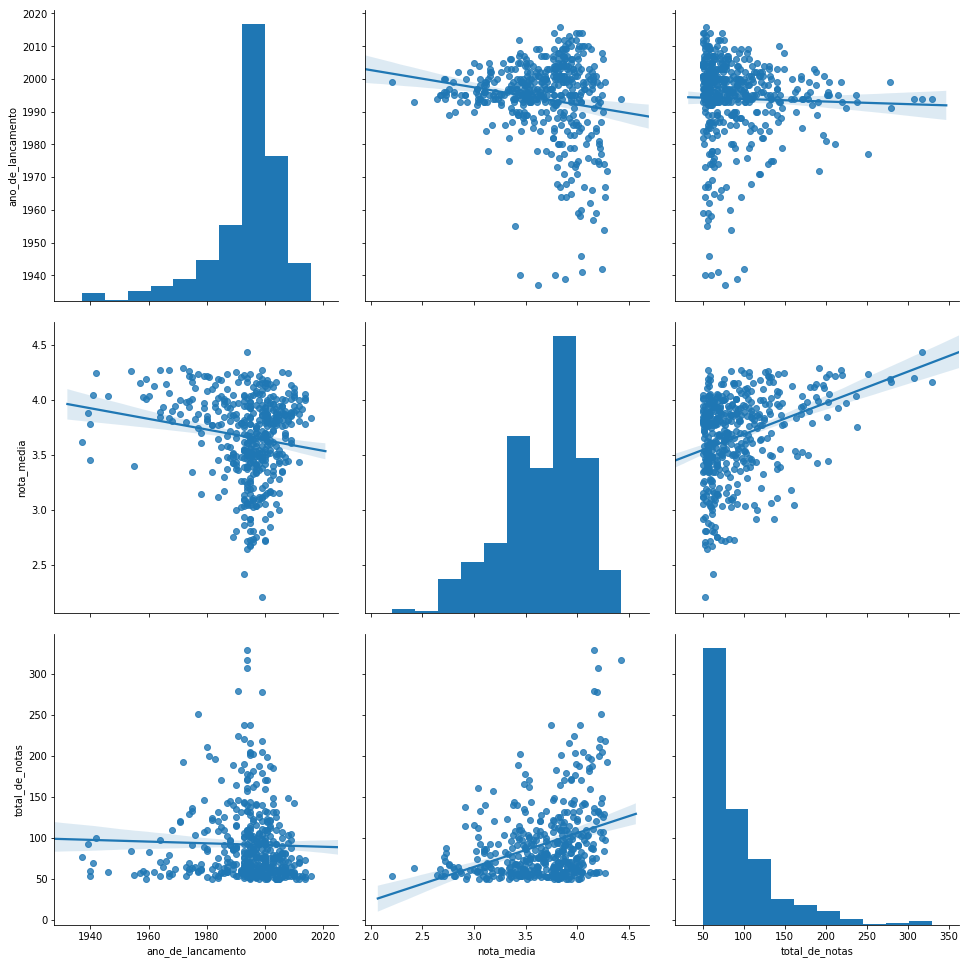

In [57]:
# solução

dados = pd.DataFrame(data = filmes, columns = ["ano_de_lancamento", "nota_media", "total_de_notas"])

sns.pairplot(data = dados, height = 4.5, kind = "reg")


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

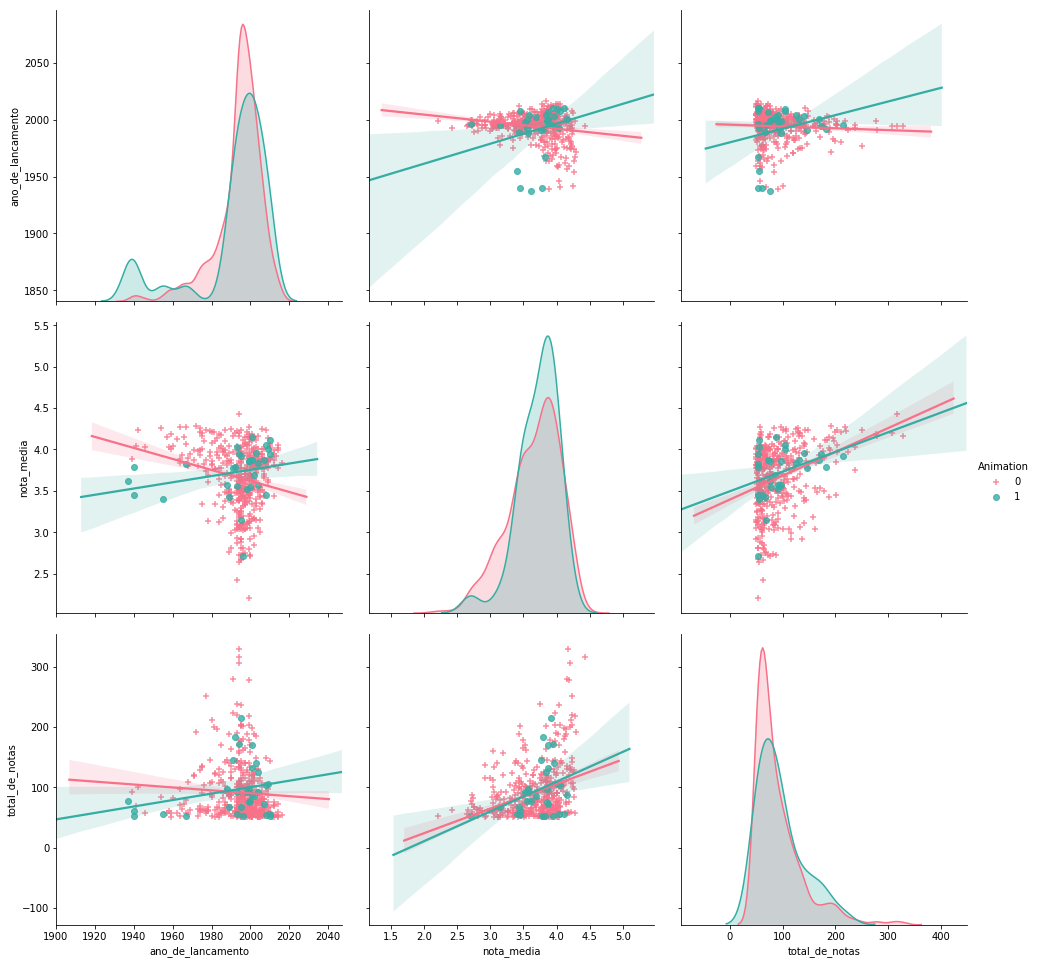

In [58]:
sns.pairplot(data = filmes,
             vars=["ano_de_lancamento", "nota_media", "total_de_notas"],
             height = 4.5,
             kind = "reg",
             hue = "Animation",
             palette = "husl",
             markers=["+", "o"])

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

---

Tudo leva a crer que a correlação dos filmes do gênero Adventure com os demais gêneros tende a -1, ou seja, as notas médias do gênero Adventure tendem a subir à medida que o ano de lançamento fica mais atual, enquanto para os demais gêneros tendem a diminuir e vice-versa.

---


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

Text(45.125, 0.5, 'Nota Média')

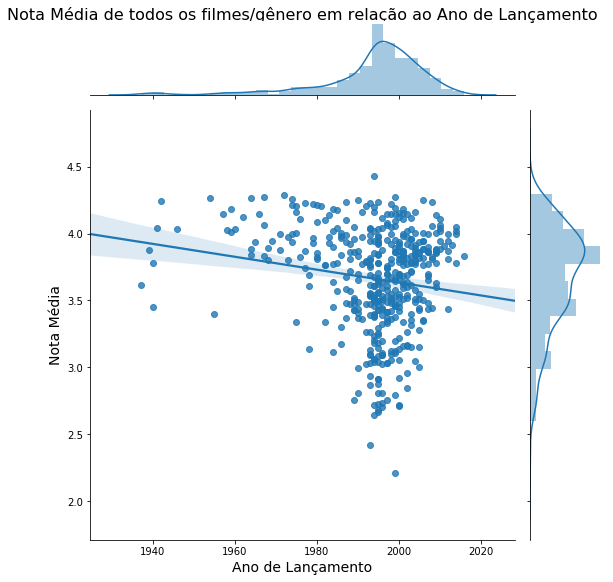

In [59]:
# solução

ax = sns.jointplot(filmes.ano_de_lancamento, filmes.nota_media, height = 8, kind="reg")

ax.ax_joint.set_title("Nota Média de todos os filmes/gênero em relação ao Ano de Lançamento", fontsize = 16, pad = 90)
ax.ax_joint.set_xlabel("Ano de Lançamento", fontsize = 14)
ax.ax_joint.set_ylabel("Nota Média", fontsize = 14)

**Observação**

---

A nota média de todos os filmes e todos os gêneros tende a cair à medida que o ano de lançamento fica mais recente.

Antigamente existiam menos filmes, porém com uma boa avaliação perante aos expectadores; já nos tempos atuais, possuem uma quantidade bem maior de filmes mas com a avaliação nem tão boa com relação à média de notas de todos os filmes.

---



**Observação**

---

Identificação do gênero com maior média de avaliações

---


In [60]:
nota_media_por_genero = pd.DataFrame((generos.values.T * filmes['nota_media'].values).T, columns = generos.columns)
nota_media_por_genero.mean().sort_values(ascending = False)

Comedy         1.425238
Drama          1.402504
Action         1.306531
Adventure      1.060509
Thriller       0.982066
Crime          0.736926
SciFi          0.727749
Romance        0.681092
Fantasy        0.534384
Children       0.379015
Mystery        0.323144
Animation      0.264712
IMAX           0.233920
Horror         0.208608
Musical        0.170247
War            0.164328
Western        0.093998
FilmNoir       0.035498
Documentary    0.016191
dtype: float64

In [0]:
filmes_genero_Comedy = filmes.query("Comedy == 1")

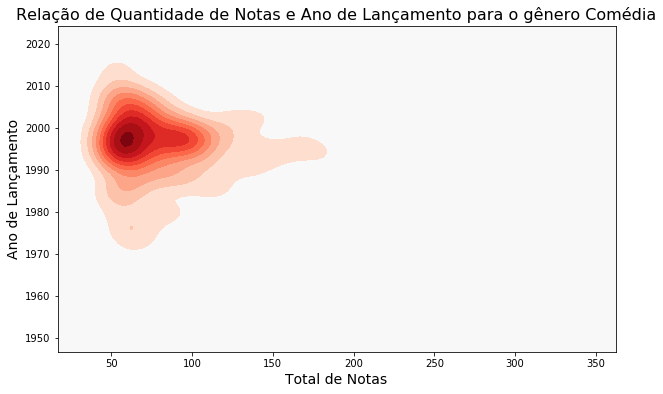

In [62]:
plt.figure(figsize=(10,6))

ax = sns.kdeplot(filmes_genero_Comedy.total_de_notas, filmes_genero_Comedy.ano_de_lancamento, cmap="Reds", shade=True, shade_lowest=False)

ax.set_title("Relação de Quantidade de Notas e Ano de Lançamento para o gênero Comédia", fontsize = 16)
ax.set_xlabel("Total de Notas", fontsize = 14)
ax.set_ylabel("Ano de Lançamento", fontsize = 14)
ax.set_facecolor("#F8F8F8")

**Observação**

---

Para o gênero com maior média de notas em relação aos demais gêneros, no caso Comédia, o gráfico acima mostra a relação da quantidade de avaliações (Total de Notas) com o ano de lançamento dos filmes desse gênero.

Existe uma densidade maior de avaliações entre 50 e 100 avaliações e à medida que a quantidade de avaliações aumenta a densidade passa a ficar menor.

---
